# CoLI-Tunglish Dataset 
Dataset link https://drive.google.com/file/d/1m0qQ9vrI9GZeKTiOV0YVjaAZ8h7Riaa8/view

The CoLI-Tunglish dataset consists of Tulu, Kannada, and English words in Roman script and are grouped into seven major categories, namely, "Tulu", “Kannada”, “English”, “Mixed-language”, “Name”, “Location” and “Other”. Each word in the Test set has to be assigned with one of these seven categories. 


# Step 1: Reading dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train_data = pd.read_csv('data/train.csv')
val_data = pd.read_csv('data/val.csv')
test_data = pd.read_csv('data/test_without_labels.csv')


## Training data

In [6]:
train_data.head(10)

,Words,Language
0,Oo,English
1,anna,Kannada
2,ninna,Tulu
3,pukuli,Tulu
4,naddh,Tulu
5,korpa,Tulu
6,.,sym
7,shivam,Name
8,music,English
9,movie,English


In [7]:
train_data.shape


(21726, 2)

In [8]:
train_data.isnull().sum()

Words       6
Language    0
dtype: int64

In [9]:
train_data = train_data.dropna()
train_data.isnull().sum()

Words       0
Language    0
dtype: int64

In [10]:
train_data.Language.value_counts()

Tulu        8645
English     5499
sym         3130
Kannada     2065
Name        1104
Other        506
Mixed        403
Location     368
Name: Language, dtype: int64

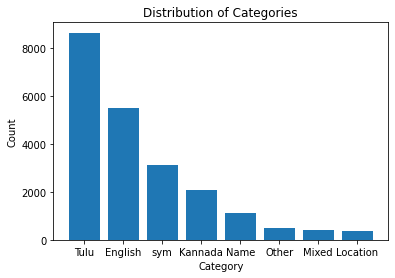

In [11]:
counts = train_data['Language'].value_counts()

plt.bar(counts.index, counts.values)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')

# Display the plot
plt.show()

### Data encoding [ training data ]

In [12]:
print(train_data['Language'].unique())

['English' 'Kannada' 'Tulu' 'sym' 'Name' 'Mixed' 'Location' 'Other']


In [13]:
data_encoded = train_data.replace({
    'Language': {'English': 0, 'Kannada': 1,'sym':2,'Tulu': 3, 'Name': 4, 'Mixed': 5,'Location': 6, 'Other': 7},
})

data_encoded.head(10)

,Words,Language
0,Oo,0
1,anna,1
2,ninna,3
3,pukuli,3
4,naddh,3
5,korpa,3
6,.,2
7,shivam,4
8,music,0
9,movie,0


In [14]:
# create a new column(feature) 'Word Length' containing the total length of all the words in the 'Words' column

data_encoded['Word Length'] = data_encoded.iloc[:, 0].apply(lambda x: sum(len(word) for word in x.split()))
data_encoded.head(10)

,Words,Language,Word Length
0,Oo,0,2
1,anna,1,4
2,ninna,3,5
3,pukuli,3,6
4,naddh,3,5
5,korpa,3,5
6,.,2,1
7,shivam,4,6
8,music,0,5
9,movie,0,5


In [15]:
x_train = data_encoded.drop('Language', axis=1)
y_train = data_encoded['Language']
x_train.head(10)

,Words,Word Length
0,Oo,2
1,anna,4
2,ninna,5
3,pukuli,6
4,naddh,5
5,korpa,5
6,.,1
7,shivam,6
8,music,5
9,movie,5


In [16]:
y_train.head(10)

0    0
1    1
2    3
3    3
4    3
5    3
6    2
7    4
8    0
9    0
Name: Language, dtype: int64

### Data encoding [ devolpment data ]

In [17]:
val_data.head(5)

,Words,Language
0,Cute,English
1,aggi,Kannada
2,love,English
3,you,English
4,.,sym


In [18]:
val_data.Language.value_counts()

Tulu        1461
English      889
sym          500
Kannada      344
Name         162
Other        102
Mixed         69
Location      54
Name: Language, dtype: int64

In [19]:
val_data = val_data.dropna()

val_data = val_data.replace({
    'Language': {'English': 0, 'Kannada': 1,'sym':2,'Tulu': 3, 'Name': 4, 'Mixed': 5,'Location': 6, 'Other': 7},
})


In [20]:
# create a new column(feature) 'Word Length' containing the total length of all the words in the 'Words' column
val_data['Word Length'] = val_data.iloc[:, 0].apply(lambda x: sum(len(word) for word in x.split()))

x_val = val_data.drop('Language', axis=1)
y_val = val_data['Language']


In [21]:
x_val.head(10)

,Words,Word Length
0,Cute,4
1,aggi,4
2,love,4
3,you,3
4,.,1
5,Mobile,6
6,boduu,5
7,Wow,3
8,.,1
9,Bari,4


In [22]:
y_val.head(10)

0    0
1    1
2    0
3    0
4    2
5    0
6    3
7    0
8    2
9    3
Name: Language, dtype: int64

### Test data

In [23]:
test_data.head(10)

,Words
0,E
1,Chanel
2,full
3,movie
4,padera
5,dumbu
6,bethe
7,yerandla
8,paduverandu
9,.


In [24]:
test_data.shape

(10505, 1)

In [25]:
test_data.isnull().sum()

Words    2
dtype: int64

In [26]:
# create a new column(feature) 'Word Length' containing the total length of all the words in the 'Words' column
test_data['Word Length'] = test_data.iloc[:, 0].apply(lambda x: sum(len(word) for word in str(x).split()))

# Print the first 10 rows of the DataFrame
test_data.head(10)


,Words,Word Length
0,E,1
1,Chanel,6
2,full,4
3,movie,5
4,padera,6
5,dumbu,5
6,bethe,5
7,yerandla,8
8,paduverandu,11
9,.,1


In [27]:
word_test_data=test_data['Words']
word_test_data = word_test_data.to_frame()
type(word_test_data)
word_test_data.shape

(10505, 1)

In [28]:
word_test_data.head(10)


,Words
0,E
1,Chanel
2,full
3,movie
4,padera
5,dumbu
6,bethe
7,yerandla
8,paduverandu
9,.


## ----------------------------------------------------

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import f1_score
import seaborn as sns

In [30]:
#preprocess function used to calculate tfidf of words column

def preprocess(train, val=None, test_data=None):
    # Create a TfidfVectorizer object and fit it on the training data
    vectorizer = TfidfVectorizer(analyzer='char_wb',ngram_range=(1,4))
    tfidf_matrix = vectorizer.fit_transform(train.iloc[:, 0])
    # Convert the sparse matrix to a dense array
    tfidf_array = tfidf_matrix.toarray()
    # Combine the TF-IDF array and the word length column into a single array
    x_train = np.hstack((tfidf_array, train.iloc[:, 1].values.reshape(-1, 1)))
    if val is not None:
        # Use the vocabulary learned on the training data to compute TF-IDF on the validation data
        tfidf_matrix_val = vectorizer.transform(val.iloc[:, 0])
        tfidf_array_val = tfidf_matrix_val.toarray()
        x_val = np.hstack((tfidf_array_val, val.iloc[:, 1].values.reshape(-1, 1)))
    if test_data is not None:
        test_data['Words'].replace(to_replace=np.nan, value='', inplace=True)
        # Use the vocabulary learned on the training data to compute TF-IDF on the text data
        tfidf_matrix_data = vectorizer.transform(test_data.iloc[:, 0])
        tfidf_array_data = tfidf_matrix_data.toarray()
        x_data = np.hstack((tfidf_array_data, test_data.iloc[:, 1].values.reshape(-1, 1)))
        if val is not None:
            return x_train, x_val, x_data
        else:
            return x_train, x_data
    else:
        if val is not None:
            return x_train, x_val
        else:
            return x_train
    


In [31]:
#eval_model2 is a helper function used to train ml model and predict x_val ==> return f1_weighted,f1_macro 

x_train_tfidf, x_val_tfidf, x_test_tfidf = preprocess(x_train, x_val,test_data)

def eval_model2(model, x_train, y_train, x_val, y_val):
    model.fit(x_train, y_train)
    predection=model.predict(x_val)
    f1_weighted = f1_score(y_val, predection, average='weighted')
    f1_macro = f1_score(y_val, predection, average='macro')
    print(metrics.classification_report(y_val,predection))
    plot_confusion(y_val,predection)
    print("accuracy : ",metrics.accuracy_score(y_val,predection))
    acc=metrics.accuracy_score(y_val,predection)
    return f1_weighted,f1_macro



In [32]:
print(x_test_tfidf)

[[0.21520835 0.         0.         ... 0.         0.         1.        ]
 [0.07185193 0.         0.         ... 0.         0.         6.        ]
 [0.09964604 0.         0.         ... 0.         0.         4.        ]
 ...
 [0.07505523 0.         0.         ... 0.         0.         4.        ]
 [0.06906245 0.         0.         ... 0.         0.         7.        ]
 [0.32232013 0.47331536 0.47331536 ... 0.         0.         1.        ]]


In [33]:
#plot confustion used to calculate and plot the confusion matrix

def plot_confusion(y_val,predection):
    cm = metrics.confusion_matrix(y_val,predection)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()

In [34]:
# creating a dictionary to store results
results_dict = {
    'model_name': [],
    'f1_weighted': [],
    'f1_macro': [],
}
def store_result(f1_weighted,f1_macro):
    print('f1_weighted: ',f1_weighted)
    print('f1_macro: ',f1_macro)
    # storing results in results_dict
    results_dict['model_name'].append(model.__class__.__name__)
    results_dict['f1_weighted'].append(f1_weighted)
    results_dict['f1_macro'].append(f1_macro)

C:\Users\DELL\anaconda3\envs\neural\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       889
           1       0.79      0.72      0.75       344
           2       1.00      1.00      1.00       500
           3       0.89      0.94      0.91      1461
           4       0.81      0.76      0.78       162
           5       0.88      0.67      0.76        69
           6       0.92      0.81      0.86        54
           7       0.77      0.54      0.64       102

    accuracy                           0.90      3581
   macro avg       0.87      0.80      0.83      3581
weighted avg       0.90      0.90      0.90      3581



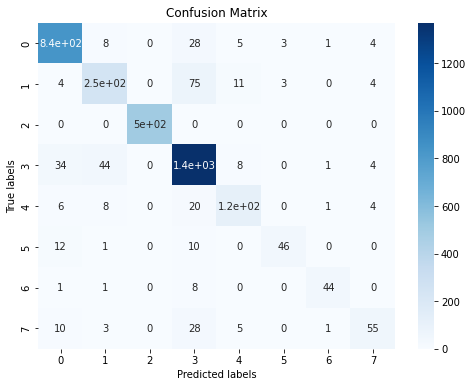

accuracy :  0.9005864283719631
f1_weighted:  0.8980267540464822
f1_macro:  0.8305184322292107


In [32]:
from sklearn.svm import LinearSVC

model=LinearSVC()
f1_weighted,f1_macro=eval_model2(model, x_train_tfidf, y_train, x_val_tfidf, y_val)
store_result(f1_weighted,f1_macro)

- MPL with 10 nodes 
 - accuracy :  0.8950013962580284
 - f1_weighted:  0.893515932957524
 - f1_macro:  0.8165357870881245
 
------------------------------------
- MPL with 20 nodes 
    - accuracy :  0.8983524155263892
    - f1_weighted:  0.8960672139946988
    - f1_macro:  0.8197858900406192
------------------------------------
- MPL with 30 nodes 
    - accuracy :  0.8958391510751187
    - f1_weighted:  0.8939319945436291
    - f1_macro:  0.8155892776344768
------------------------------------
- MPL with 40 nodes 
    - accuracy :  0.8952806478637252
    - f1_weighted:  0.8941894225149445
    - f1_macro:  0.8131726530673914

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       889
           1       0.64      0.59      0.62       344
           2       0.99      1.00      0.99       500
           3       0.80      0.90      0.85      1461
           4       0.74      0.63      0.68       162
           5       0.86      0.35      0.49        69
           6       0.77      0.80      0.78        54
           7       0.57      0.13      0.21       102

    accuracy                           0.83      3581
   macro avg       0.78      0.66      0.69      3581
weighted avg       0.82      0.83      0.82      3581



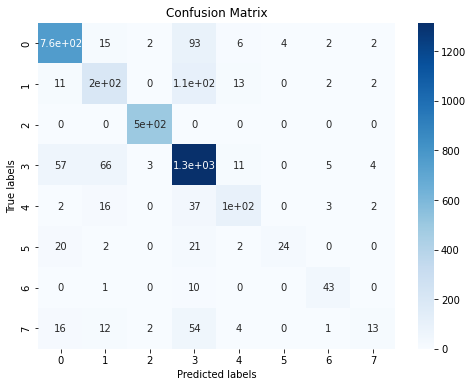

accuracy :  0.8279810108908127
f1_weighted:  0.8173460486177491
f1_macro:  0.6863011469395806


In [34]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 12, metric = 'minkowski', p = 2)
f1_weighted,f1_macro=eval_model2(model, x_train_tfidf, y_train, x_val_tfidf, y_val)
store_result(f1_weighted,f1_macro)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       889
           1       0.38      0.57      0.45       344
           2       1.00      1.00      1.00       500
           3       0.88      0.63      0.73      1461
           4       0.48      0.83      0.61       162
           5       0.42      0.61      0.49        69
           6       0.73      0.81      0.77        54
           7       0.28      0.63      0.39       102

    accuracy                           0.73      3581
   macro avg       0.63      0.74      0.66      3581
weighted avg       0.80      0.73      0.75      3581



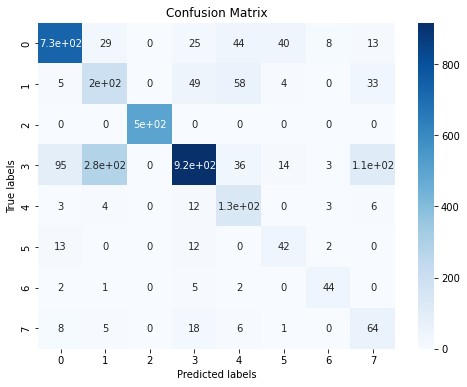

accuracy :  0.7330354649539235
f1_weighted:  0.74959761366596
f1_macro:  0.660279495421324


In [35]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
f1_weighted,f1_macro=eval_model2(model, x_train_tfidf, y_train, x_val_tfidf, y_val)
store_result(f1_weighted,f1_macro)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       889
           1       0.77      0.62      0.68       344
           2       1.00      1.00      1.00       500
           3       0.82      0.95      0.88      1461
           4       0.80      0.60      0.69       162
           5       1.00      0.22      0.36        69
           6       0.91      0.80      0.85        54
           7       0.69      0.28      0.40       102

    accuracy                           0.87      3581
   macro avg       0.86      0.67      0.72      3581
weighted avg       0.87      0.87      0.86      3581



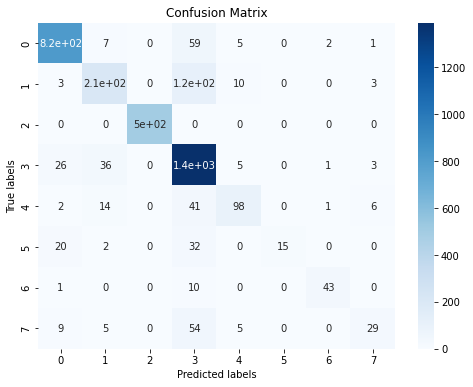

accuracy :  0.866238480871265
f1_weighted:  0.8554767979263261
f1_macro:  0.7231776527764309


In [36]:
from sklearn.linear_model import SGDClassifier

# Create an instance of the SGDClassifier
model = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3)
f1_weighted,f1_macro=eval_model2(model, x_train_tfidf, y_train, x_val_tfidf, y_val)
store_result(f1_weighted,f1_macro)

C:\Users\DELL\anaconda3\envs\neural\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\envs\neural\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\envs\neural\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.89      0.89       889
           1       0.92      0.36      0.51       344
           2       1.00      1.00      1.00       500
           3       0.72      0.98      0.83      1461
           4       0.80      0.27      0.41       162
           5       0.00      0.00      0.00        69
           6       0.00      0.00      0.00        54
           7       0.00      0.00      0.00       102

    accuracy                           0.81      3581
   macro avg       0.54      0.44      0.45      3581
weighted avg       0.78      0.81      0.77      3581



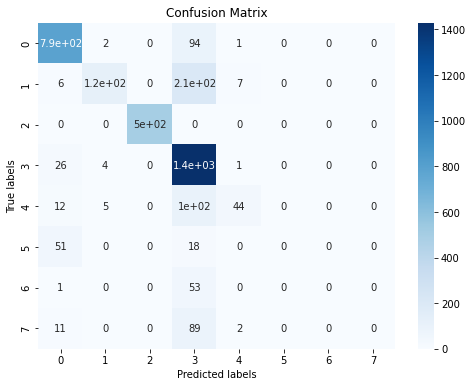

accuracy :  0.8067578888578609
f1_weighted:  0.7651631393931645
f1_macro:  0.4542632279196186


In [37]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
f1_weighted,f1_macro=eval_model2(model, x_train_tfidf, y_train, x_val_tfidf, y_val)
store_result(f1_weighted,f1_macro)

In [ ]:

from sklearn.neural_network import MLPClassifier

model=MLPClassifier(hidden_layer_sizes=(10,))

f1_weighted,f1_macro=eval_model2(model, x_train_tfidf, y_train, x_val_tfidf, y_val)
store_result(f1_weighted,f1_macro)


In [ ]:

from sklearn.neural_network import MLPClassifier

model=MLPClassifier(hidden_layer_sizes=(20,))

f1_weighted,f1_macro=eval_model2(model, x_train_tfidf, y_train, x_val_tfidf, y_val)
store_result(f1_weighted,f1_macro)


In [ ]:

from sklearn.neural_network import MLPClassifier

model=MLPClassifier(hidden_layer_sizes=(30,))

f1_weighted,f1_macro=eval_model2(model, x_train_tfidf, y_train, x_val_tfidf, y_val)
store_result(f1_weighted,f1_macro)


In [ ]:

from sklearn.neural_network import MLPClassifier

model=MLPClassifier(hidden_layer_sizes=(50,))

f1_weighted,f1_macro=eval_model2(model, x_train_tfidf, y_train, x_val_tfidf, y_val)
store_result(f1_weighted,f1_macro)


In [ ]:
results_df = pd.DataFrame(results_dict)
results_df

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results_df.plot.bar(x='model_name', y=['f1_weighted', 'f1_macro'], figsize=(7, 7))
plt.grid(axis='y')
plt.show()

# Final Test
- Best Model ---> LinearSVC

In [35]:
# evaluate function without y_test (labels) just for see predection
def evaluate(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    prediction=model.predict(x_test)
    return prediction

In [36]:
#from sklearn.svm import LinearSVC
#best_model=LinearSVC()

#-----------------------------------------------------------------------------------------------------------------------
#from sklearn.linear_model import SGDClassifier
#best_model = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3)
#-----------------------------------------------------------------------------------------------------------------------
from sklearn.neural_network import MLPClassifier

best_model=MLPClassifier(hidden_layer_sizes=(20,))

prediction=evaluate(best_model, x_train_tfidf, y_train,x_test_tfidf)


In [37]:
prediction

array([3, 0, 0, ..., 3, 1, 2], dtype=int64)

- English: 0
- Kannada: 1
- sym:2
- Tulu: 3
- Name: 4 
- Mixed: 5
- Location: 6
- Other: 7


In [38]:
predictions_df = pd.DataFrame(prediction, columns=['Language'])

# Print the first few rows of the DataFrame
predictions_df.head(30)

,Language
0,3
1,0
2,0
3,0
4,3
5,3
6,3
7,3
8,3
9,2


In [39]:
predictions_df

,Language
0,3
1,0
2,0
3,0
4,3
...,...
10500,2
10501,3
10502,3
10503,1


In [40]:
predictions_df.shape

(10505, 1)

In [41]:
word_test_data.shape

(10505, 1)

In [42]:

result = word_test_data.join(predictions_df,lsuffix='_test',rsuffix='_pred')

print(result) 


result.to_csv('BFCAI_Run1.csv', index=False)

         Words  Language
0            E         3
1       Chanel         0
2         full         0
3        movie         0
4       padera         3
...        ...       ...
10500        .         2
10501    appeg         3
10502     kopa         3
10503  jaasthi         1
10504        .         2

[10505 rows x 2 columns]


In [23]:
data = pd.read_csv('result_without_string/BFCAI_Run3.csv')


data.head(10)

,Words,Language
0,E,3
1,Chanel,0
2,full,0
3,movie,0
4,padera,3
5,dumbu,3
6,bethe,3
7,yerandla,3
8,paduverandu,3
9,.,2


In [24]:
type(data)

pandas.core.frame.DataFrame

In [25]:
language_dict = {0: 'English', 1: 'Kannada', 2: 'sym', 3: 'Tulu', 4: 'Name', 5: 'Mixed', 6: 'Location', 7: 'Other'}

# Replace the integers in the 'language' column with the corresponding strings
data['Language'] = data['Language'].replace(language_dict)

In [26]:
data.head(10)

,Words,Language
0,E,Tulu
1,Chanel,English
2,full,English
3,movie,English
4,padera,Tulu
5,dumbu,Tulu
6,bethe,Tulu
7,yerandla,Tulu
8,paduverandu,Tulu
9,.,sym


In [27]:
data.to_csv('actual_tag/BFCAI_Run3.csv', index=False)